# Analysing Traffic on the Interstate 94 (I-94) Highway

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows. We will use various data visualisation techniques for this.

We're going to analyse a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

We read in the data and inspect it:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

i94_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(i94_traffic.head())
print('\n')
print(i94_traffic.tail())
print('\n')
print(i94_traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0 

## Exploring overall traffic volume

According to the [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume), the data was recorded by a station midway between Minneapolis and Saint Paul. It only records westbound data. So this is dataset should not be generalised to the whole I-94.
We start by examining the `traffic_volume` column.

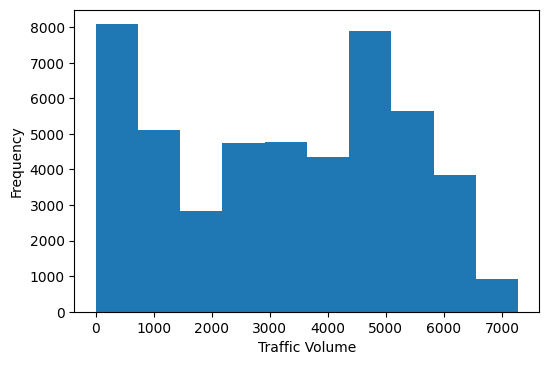

In [2]:
i94_traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [3]:
print(i94_traffic['traffic_volume'].describe())

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


The histogram indicates that the data seems not strongly skewed. But it seems that it might have two modes: One distribution, with a traffic volume up to 2000 cars, to the left, might potentially be a right-skewed distribution. The other with volumes of more than 200 cars, slightly to the right, might be a more symmetric distribution with a mode at 5000. This might suggest that the the information about daytime and nighttime traffic is not yet separated. During nighttime, we observe very little traffic volume (first mode to the left), during daytime considerably more (second mode).

Additionally, looking at the descriptive statistics, we find that 25% 1193 cars or fewer are counted (probably during the night). 75% of the time, the traffic volume was 4933 cars or fewer. This would match with the data shown in the histogram. We therefore have good reasons to examine the data separately for day and nighttime.

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [4]:
i94_traffic['date_time'] = pd.to_datetime(i94_traffic['date_time'])

In [5]:
print(i94_traffic['date_time'].head)

<bound method NDFrame.head of 0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]>


In [6]:
hour_dt = i94_traffic['date_time'].dt.hour # extracting the hour from the datetime object

In [7]:
print(hour_dt)

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64


In [8]:
i94_traffic['hour_dt'] = i94_traffic['date_time'].dt.hour
daytime = i94_traffic[(i94_traffic['hour_dt'] >= 7) & (i94_traffic['hour_dt'] < 19)]
nighttime = i94_traffic[(i94_traffic['hour_dt'] >= 19) | (i94_traffic['hour_dt'] < 7)]

## Comparing day and night

Now all the daytime traffic data is contained in `daytime`and all the nighttime data in `nighttime`. We can now plot separate histograms for day and night. We will organise them side by side in a grid chart.

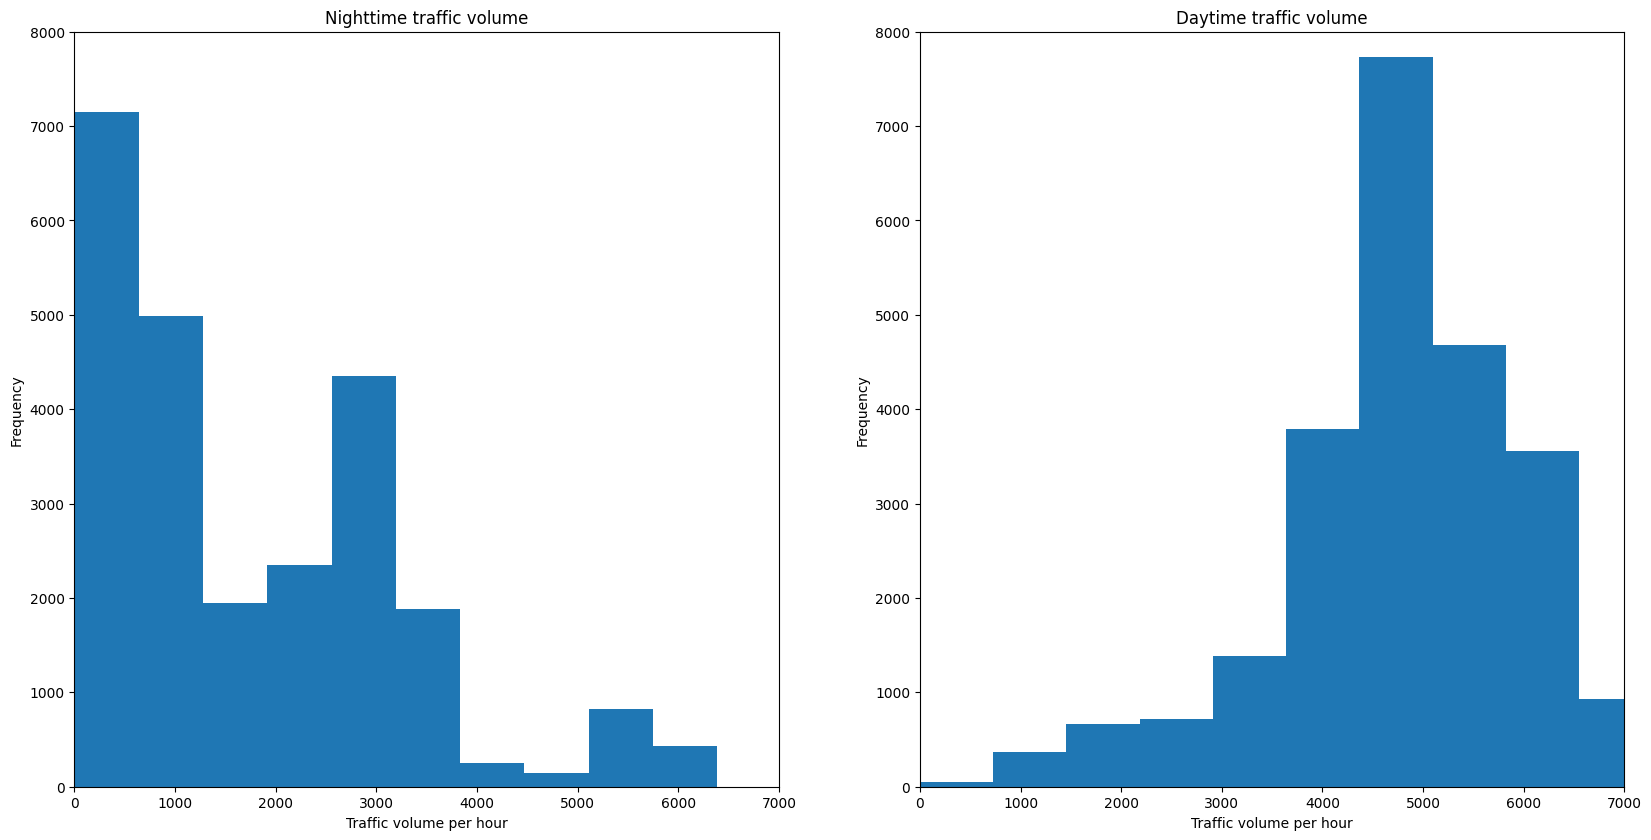

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(nighttime['traffic_volume'])
plt.xlabel('Traffic volume per hour')
plt.ylabel('Frequency')
plt.title('Nighttime traffic volume')
plt.xlim([0, 7000])
plt.ylim([0, 8000])

plt.subplot(1,2,2)
plt.hist(daytime['traffic_volume'])
plt.xlabel('Traffic volume per hour')
plt.ylabel('Frequency')
plt.title('Daytime traffic volume')
plt.xlim([0, 7000])
plt.ylim([0, 8000])

plt.show()


In [10]:
print(nighttime['traffic_volume'].describe())
print('\n')
print(daytime['traffic_volume'].describe())

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


The histograms, plotted separately by day and night, as well as the descriptive statistics reveal the following:
* The distribution of traffic volume during the night is right skewed with a median volume of 1287 cars per hour
* The distribution of traffic volume during the day is left skewed with a median volume of 4820 cars per hour
* During the day, we observe a bit more than double the traffic volume than durnig the night

I our main interest is in high traffic volume, then the nighttime data might not be ideal. However, it should be noted that it has a farily long tail. In the extreme, we do find times during the night where the traffic volume exceeds the average daytime volume. Thes could be interesting instances to study too. For now, however, we move on with just analysing the daytime data.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

## Monthly traffic volume patterns

We calculate the average traffic colume over months first.

In [11]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

print(by_month['traffic_volume'])

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


<ipython-input-11-7176cd67517d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



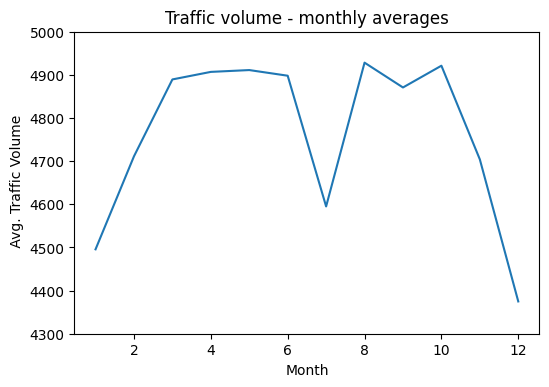

In [12]:
by_month['traffic_volume'].plot.line(x=by_month['traffic_volume'].index,
                                    y='traffic_volume')
plt.title('Traffic volume - monthly averages')
plt.xlabel('Month')
plt.ylabel(' Avg. Traffic Volume')
plt.ylim([4300, 5000])
plt.show()

The daytime traffic volume is low on average during January and December, when it's falling below 4500 cars per hour per month. It increases from February to March, reaching a plateau of ca. 4900 cars per hour on average per month. It stays on that level until July, where we observe a sudden drop to ca. 4600 cars per hour on average. From August until October the volume rises to 4900 cars on average again, then dropping to the winter level during November.
Let's examine the volume by day of the week.

## Traffic volume during different days of the week

In [13]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday
print(by_dayofweek['traffic_volume'])

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


<ipython-input-13-b90489e58edb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



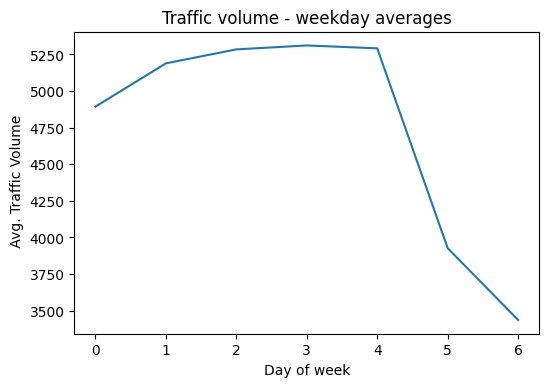

In [14]:
by_dayofweek['traffic_volume'].plot.line(x=by_dayofweek['traffic_volume'].index,
                                    y='traffic_volume')
plt.title('Traffic volume - weekday averages')
plt.xlabel('Day of week')
plt.ylabel(' Avg. Traffic Volume')
plt.show()

Clearly we find strong differences in traffic volume between business days (Monday until Friday) and the weekend (Saturday, Sunday). On business days, we observe a slowly increasing volume from 4900 to 5300 cars on average throughout the week. ON the weekend, the volume drops to 4000 cars on Saturday, and even lower to 3500 cars on average on a given Sunday.

## Hourly traffic volume patterns, business days vs. weekends

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [15]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-15-f8473ede9f01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



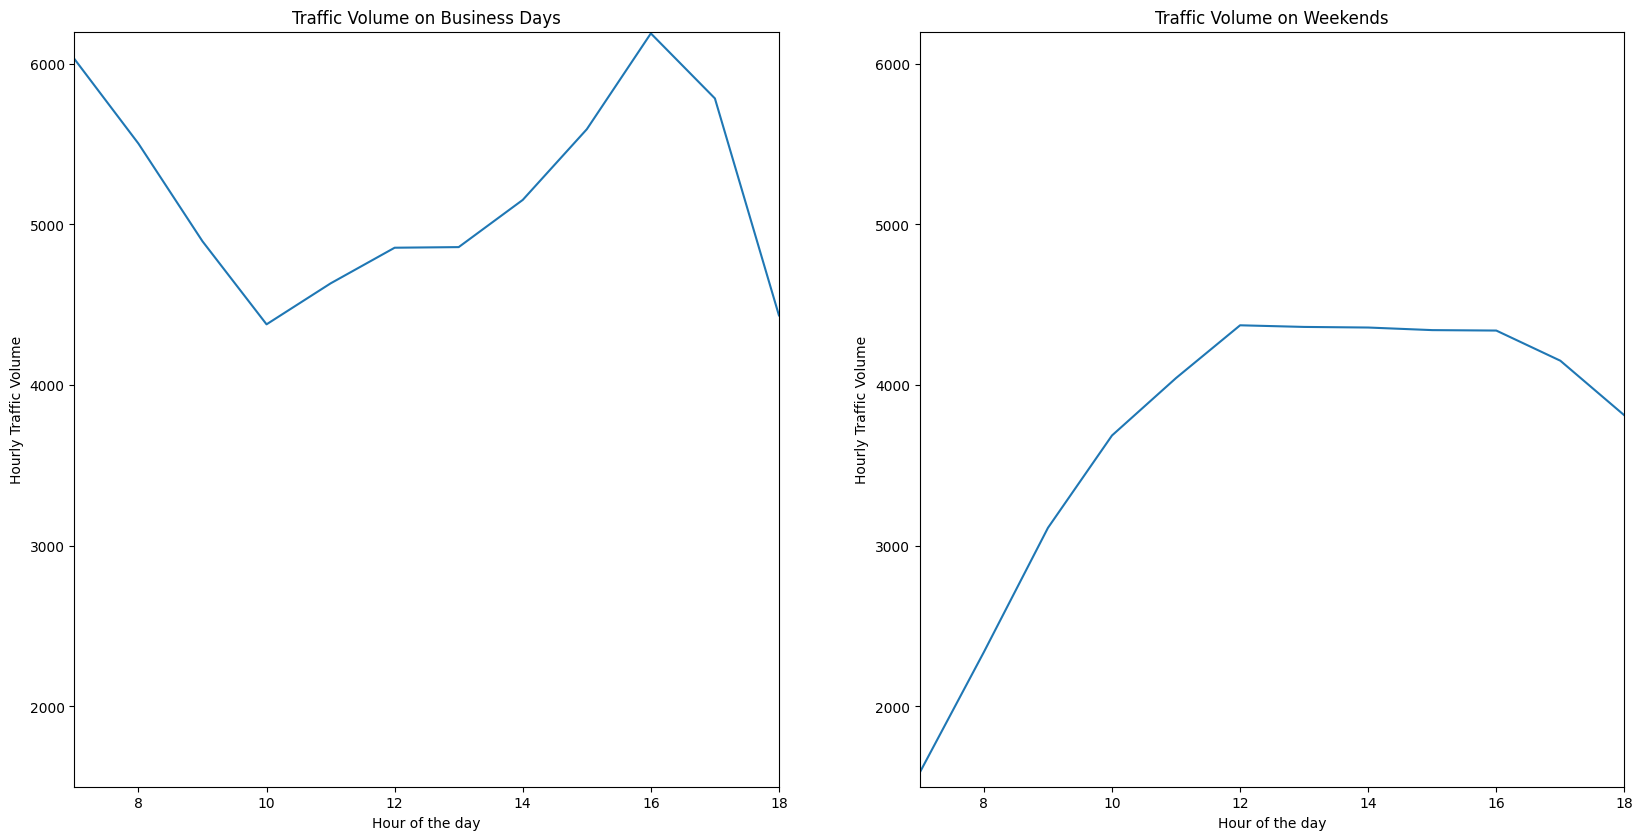

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line(x=by_hour_business['traffic_volume'].index,
                                    y='traffic_volume')
plt.xlabel('Hour of the day')
plt.ylabel('Hourly Traffic Volume')
plt.title('Traffic Volume on Business Days')
plt.xlim([7, 18])
plt.ylim([1500, 6200])

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line(x=by_hour_weekend['traffic_volume'].index,
                                    y='traffic_volume')
plt.xlabel('Hour of the day')
plt.ylabel('Hourly Traffic Volume')
plt.title('Traffic Volume on Weekends')
plt.xlim([7, 18])
plt.ylim([1500, 6200])

plt.show()

Both plots show distinctive rush hour patterns:
* During businees days, the morning peak traffic volume is between 7 am and 8 am (6000 cars per hour), then steadily decreasing until 10 am.
* The peak rushour for people to drive home on business days is between 3 pm and 5 pm, peaking around 4 pm (6500 cars per hour)
* On the weekend there is a high plateau of traffic volume between noon until approximately 5 pm. If you are in a hurry on a weekend, try to leave the house well before noon.
* Generally, the level of traffic volume is much lower on the weekend (maximum 4500 cars per hour), resembling off-peak hours during business days.
* Since people are not bound to reach work and return from work at specific times, the traffic volume is more evenly distributed on the weekend

## Conclusion time patterns

Our analysis identified a number of interesting patterns that could be interesting for traffic planners and people that want to adjust their driving to the traffic volume.

* High traffic volumes occur usually during daytime. Anyone who needs to get to their destination fast should choose nighttime driving over daytime driving.
* The traffic volume is fairly constant during the non-winter months, reaching a level of ca. 5000 cars. During winter, the volume will be lower (ca. 4500 cars per hour); an exception is the month of July, where probably due to vacation time, a dip in the traffic volume is observed.
* Looking at hourly traffic patterns, one has to differentiate between business days and weekends. During business days, there are peak times between 7 am and 8 am, as well as between 3 pm and 5 pm. On the weekends there is a steady volume between noon and 5 pm, but on a lower level than during business days.


Previously, we examined the correlation between `traffic_volume` and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

We're going to calculate the average traffic volume associated with each unique value in these two columns. 

In [17]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

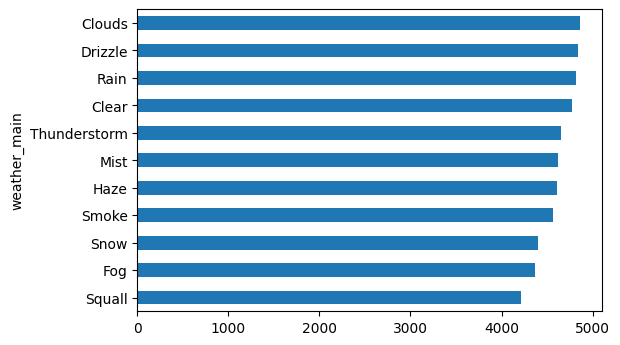

In [18]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.show()

The weather main types do not differentiate heavy traffic very well. None of the categories shows a volume exceeding 5000 cars. Whenever conditions fall into the categories "Haze", "Smoke", "Fog" or "Squall", indicating worse sight, we observe reduced traffic volumes falling below 4500 cars per hour.

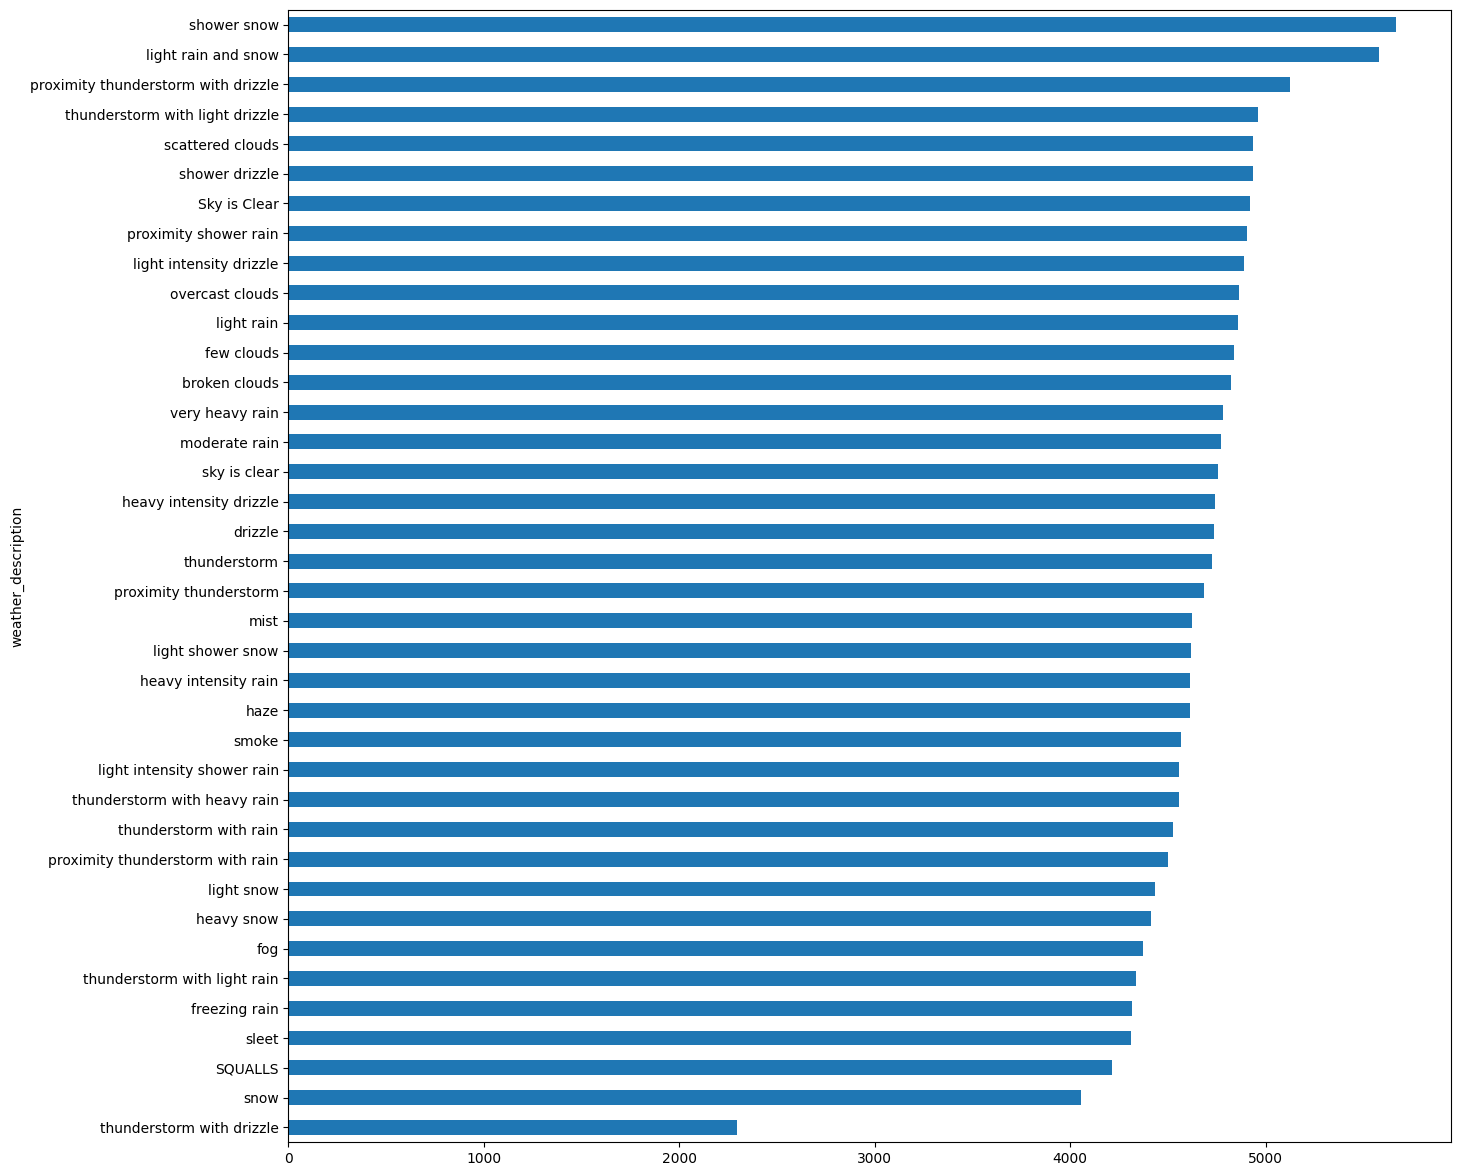

In [21]:
plt.figure(figsize=(15,15))
by_weather_description['traffic_volume'].sort_values().plot.barh()
plt.show()

Looking at the more finegrained weather descriptions, two weather conditions stand out as high frequency traffic conditions, "shower snow" and "light rain and snow". This seems slightly counter intuitive. Why would people choose these conditions to drive more frequently? Probably the weather is confounded with the Christmas holidays: We are more likely to observe these weather at Christmas, and these are popular days for people to visit their families.

There are a number of much worse conditions that indicate markedly reduced traffic volumes, such as heavy snow, for, thunderstorm with light rain, freezing rain, sleet, squalls, snow, thunderstrom and drizzle. Under these conditions the average traffic volume drops below 4500 cars per hour.

## Conclusions

Patterns of high traffic volume can be predicted by range of indicators. We found that heavy traffic is more likely during...

* the daytime rather than the night time
* during summer months (good weather conditions) arather than during winter months (bad weather conditions)
* there is a low in traffic volume during July, presumably due to holiday season
* traffic volume is higher during business days than on weekends, and peak hours are between 7 am- 8 am and 3 pm - 5 pm
* on weekends there is a relatively high frequency from noon onwards, but much lower than during bsuiness days
* weather patterns are somewhat indicative of traffic patterns, with very bad weather conditions predicting lower traffic volume
* there seems to be some confounding with shower snow and light rain and snow, which might be related to holidays of Thanksgiving and Christmas and where people are much more likely to drive in order to visit their families.